In [1]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import timedelta,date
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Import as Dataframe
# df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
with open('input\input01.txt', 'r') as file:
    data = file.read().split("\n")
    
n = int(data.pop(0))
listDate = []
for i in range(0,n):
    listDate.append(date(2012, 10, 1) + timedelta(i))
    
df = pd.DataFrame()
df['Date'] = listDate
df['traffic'] = list(map(int, data))

df.head()

,Date,traffic
0,2012-10-01,1339
1,2012-10-02,1462
2,2012-10-03,1702
3,2012-10-04,1656
4,2012-10-05,1439


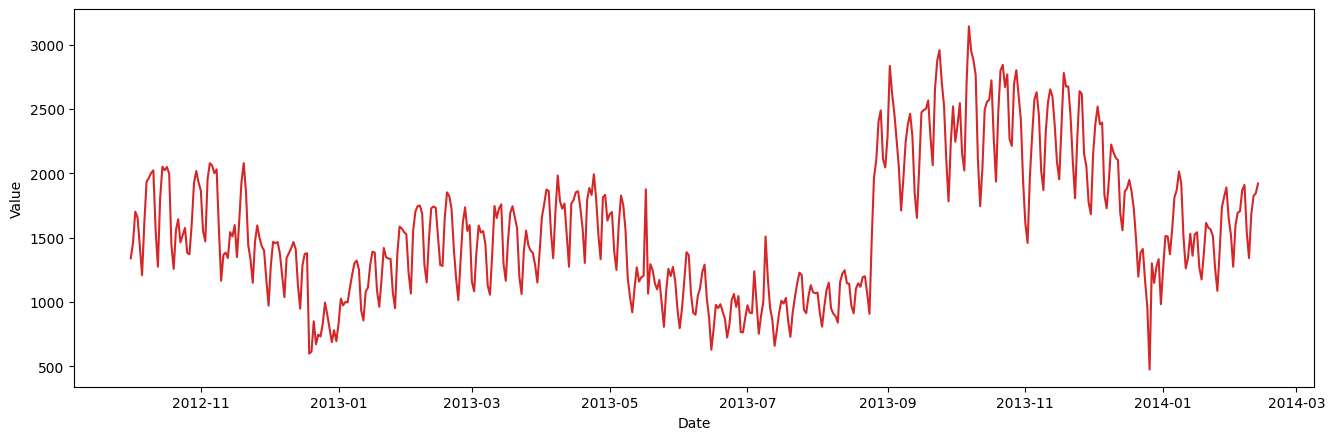

In [2]:
# df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, df['Date'].values, df['traffic'].values)    

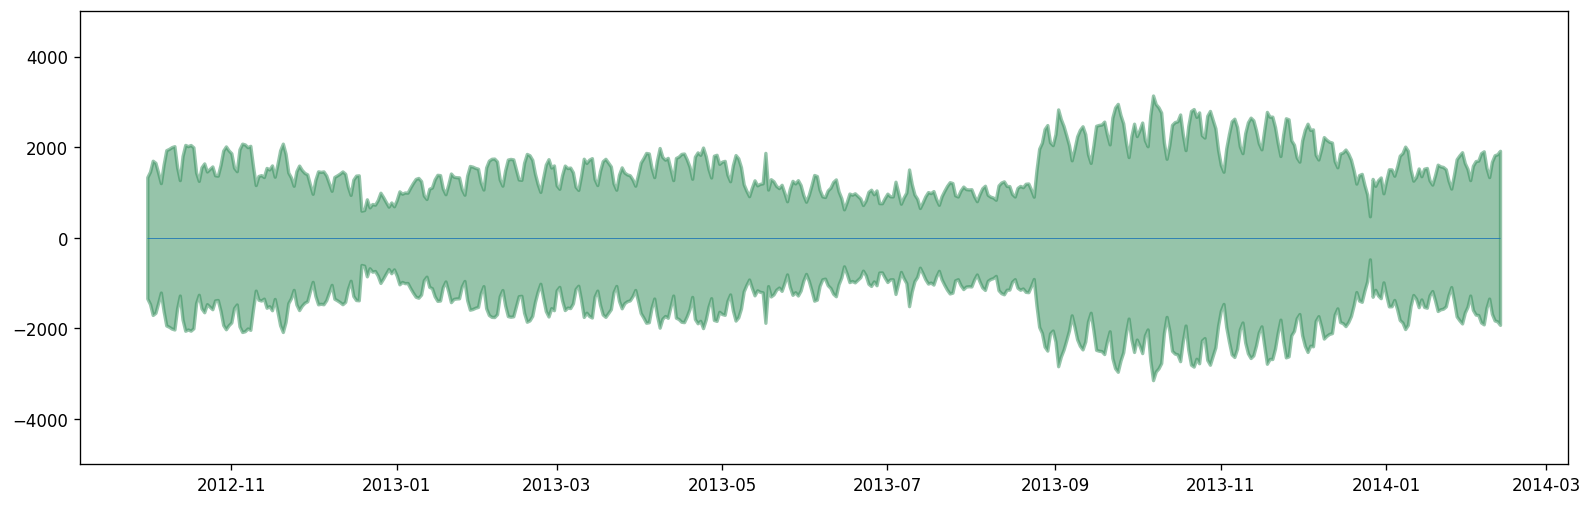

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(df['Date'].values, y1=df['traffic'].values, y2=-df['traffic'].values, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-5000, 5000)
plt.hlines(y=0, xmin=np.min(df.Date), xmax=np.max(df.Date), linewidth=.5)
plt.show()

In [4]:
from statsmodels.tsa.stattools import adfuller

def testADF(data):
    print(" > Is the data stationary ?")
    dftest = adfuller(data, autolag='AIC')
    print("Test statistic = {:.3f}".format(dftest[0]))
    print("P-value = {:.3f}".format(dftest[1]))
    print("Critical values :")
    for k, v in dftest[4].items():
        print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

testADF(df['traffic'])

 > Is the data stationary ?
Test statistic = -1.875
P-value = 0.344
Critical values :
	1%: -3.4439615820186846 - The data is not stationary with 99% confidence
	5%: -2.8675425624806605 - The data is not stationary with 95% confidence
	10%: -2.5699671340268937 - The data is not stationary with 90% confidence


In [5]:
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df['traffic'], order=(4,1,8))
model_fit = model.fit()
print(model_fit.summary().tables[1])
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
# residuals.plot()
# pyplot.show()
# residuals.plot(kind='kde')
# pyplot.show()
# print(residuals.describe())


                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.8127      4.135      0.197      0.844      -7.292       8.917
ar.L1.D.traffic     0.8010      0.007    115.473      0.000       0.787       0.815
ar.L2.D.traffic    -1.4387      0.008   -170.967      0.000      -1.455      -1.422
ar.L3.D.traffic     0.7960      0.008     95.442      0.000       0.780       0.812
ar.L4.D.traffic    -0.9906      0.006   -159.930      0.000      -1.003      -0.978
ma.L1.D.traffic    -0.8998      0.046    -19.721      0.000      -0.989      -0.810
ma.L2.D.traffic     1.3547      0.062     21.812      0.000       1.233       1.476
ma.L3.D.traffic    -0.9193      0.090    -10.228      0.000      -1.095      -0.743
ma.L4.D.traffic     0.8434      0.109      7.742      0.000       0.630       1.057
ma.L5.D.traffic    -0.0950      0.110     -0.866      0.387      -0.310     

In [6]:
train = df.iloc[:len(df)-12] 
test = df.iloc[len(df)-12:] # set one year(12 months) for testing 

start = len(train) 
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set 
predictions = model_fit.predict(start, end, 
                             typ = 'levels').rename("Predictions") 

print(r2_score(test['traffic'],predictions))

0.7802528881014471


In [7]:
test['traffic']

488    1274
489    1592
490    1694
491    1705
492    1869
493    1910
494    1544
495    1341
496    1679
497    1823
498    1845
499    1921
Name: traffic, dtype: int64

In [8]:
predictions

488    1376.157542
489    1485.829144
490    1811.018750
491    1687.587378
492    1705.659275
493    1811.494114
494    1652.126229
495    1395.792340
496    1548.156294
497    1874.168120
498    1819.835496
499    1866.617146
Name: Predictions, dtype: float64

In [9]:
print(r2_score(df['traffic'].dropna(), model_fit.predict(start=1, end = 500,typ = 'levels')))

0.8898616931920506


In [10]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(3,1,4))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

NameError: name 'series' is not defined

In [ ]:
print(r2_score(test, predictions))

# (0,1,8) R2 = 0.8036838520741585

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 7, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

In [ ]:
test_stationarity(df['traffic'])

In [ ]:
first_diff = df.traffic - df.traffic.shift(1)
first_diff = first_diff.dropna(inplace = False)
test_stationarity(first_diff, window = 7)

In [ ]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.traffic, lags=40, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.traffic, lags=40, ax=ax2)# , lags=40

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(first_diff, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(first_diff, lags=40, ax=ax2)

In [ ]:
# AR = 11, from Autocorrelation, I = 1

In [ ]:
train = df[:int(0.7*(len(data)))]
valid = df[int(0.7*(len(data))):]

#preprocessing (since arima takes univariate series as input)
train.drop('Date',axis=1,inplace=True)
valid.drop('Date',axis=1,inplace=True)

#plotting the data
train['traffic'].plot()
valid['traffic'].plot()

In [ ]:
from pyramid.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

In [ ]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [ ]:
y = pm.datasets.load_wineind()
train, test = train_test_split(y, train_size=150)

In [ ]:
model = pm.auto_arima(df['traffic'], seasonal=False, m=1)


In [ ]:
forecasts = model.predict(test.shape[0])

In [ ]:
x = np.arange(y.shape[0])
plt.plot(x[:150], train, c='blue')
plt.plot(x[150:], forecasts, c='green')
plt.show()